# Mini project(Detect heart diease)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

In [6]:
df = pd.read_csv("heart.csv")
df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [7]:
#Main code 
X = df.drop('target', axis=1)   # Input features
y = df['target']  # Output: 1 = yes, 0 = no

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split dataset

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction function
def show_prediction_result(prediction):
    if prediction[0] == 1:
       display(HTML("<p style='font-size:40px;font-weight:bold; color:red;'>🔴 You may have heart disease.</p>"))

    else:
       display(HTML("<p style='font-size:40px;font-weight:bold; color:green;'>🟢 You don't have heart disease.</p>"))
       

def predict_heart_disease(input_data):
    
    input_df = pd.DataFrame([input_data], columns=X.columns)  #Convert to DataFrame
  
    input_scaled = scaler.transform(input_df) #Scale user data just like training data 

    prediction = model.predict(input_scaled) #Predict
    show_prediction_result(prediction)

#(user_input)
user_input = input("Enter the 13 values:[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]")

# Convert string to list
user_input = eval(user_input)
predict_heart_disease(user_input)


Enter the 13 values:[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal] 23,1,23,45,56,78,89,67,56,78,45,34,23


# Data Preprocessing

In [8]:
#missing value check
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)
23.
# If missing, fill them (for example with median)
df = df.fillna(df.median(numeric_only=True))  # Only numeric columns


Missing Values per Column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Outlier Detection & Removal (Z-score method)

In [9]:
# Calculate z-score
z_scores = zscore(df.select_dtypes(include=[float, int]))

# Create a boolean mask: True = keep, False = outlier
mask = (abs(z_scores) < 3).all(axis=1)

# Filter the DataFrame
df_clean = df[mask]
print(f"Original rows: {df.shape[0]}, After removing outliers: {df_clean.shape[0]}")


Original rows: 303, After removing outliers: 287


# Feature Engineering 

In [11]:
# Risk score compute function
def compute_risk(row):
    score = 0
    if row['age'] > 50:
        score += 1
    if row['chol'] > 240:
        score += 1
    if row['thalach'] < 100:
        score += 1
    if row['sex'] == 1 and row['age'] > 55:
        score += 1
    return score

# Apply with .loc to avoid warning
df_clean.loc[:, 'risk_score'] = df_clean.apply(compute_risk, axis=1)


In [ ]:
#If i do this, the warning will not appear and this risk_score will be added to df_clean nicely.

# Visiualization

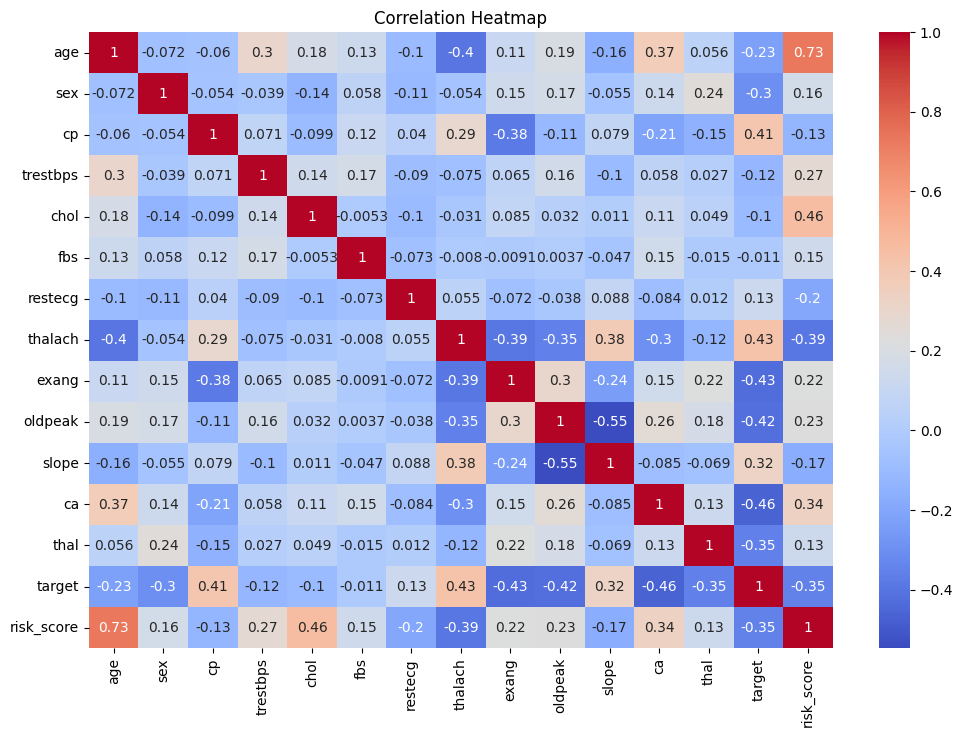

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# some chart

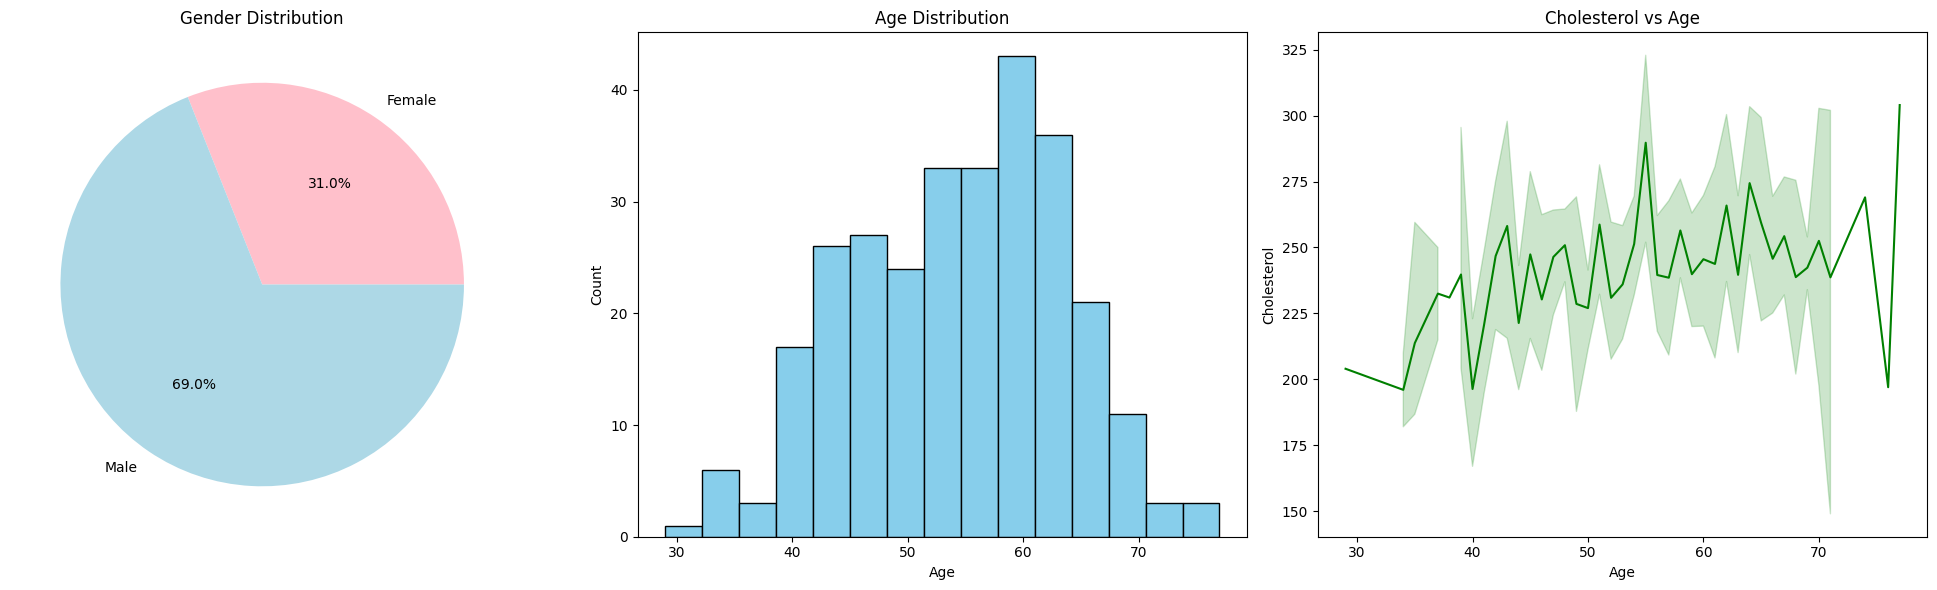

In [14]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Pie Chart
labels = ['Female', 'Male']
counts = df_clean['sex'].value_counts().sort_index()
axes[0].pie(counts, labels=labels, autopct='%1.1f%%', colors=['pink', 'lightblue'])
axes[0].set_title("Gender Distribution")

#Histogram (age)
axes[1].hist(df_clean['age'], bins=15, color='skyblue', edgecolor='black')
axes[1].set_title("Age Distribution")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

#  Line Chart (Age vs Cholesterol)
sns.lineplot(x='age', y='chol', data=df_clean, ax=axes[2], color='green')
axes[2].set_title("Cholesterol vs Age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Cholesterol")

# Adjust layout
plt.tight_layout()
plt.show()

#  Model Comparison

In [14]:
import xgboost as xgb
print("XGBoost version:", xgb.__version__)

XGBoost version: 3.0.2


In [15]:
# Data split
X = df_clean.drop('target', axis=1)
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Model Dictionary
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Accuracy', ascending=False))




                Model  Accuracy  F1 Score
2                 KNN  0.827586  0.848485
3                 SVM  0.810345  0.835821
1  LogisticRegression  0.810345  0.845070
0        RandomForest  0.775862  0.793651
4             XGBoost  0.758621  0.794118


C:\Users\Upoma\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:05:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\Upoma\AppData\Local\Temp\ipykernel_6400\4063895293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='Set2')


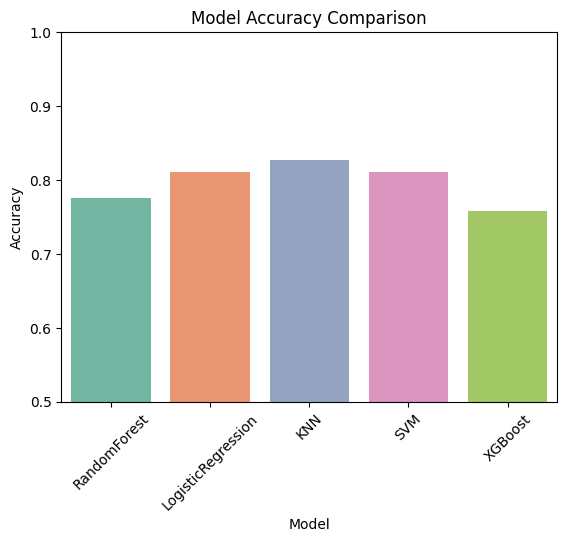

In [26]:
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()


# Evaluation Visualization

C:\Users\Upoma\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:11:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


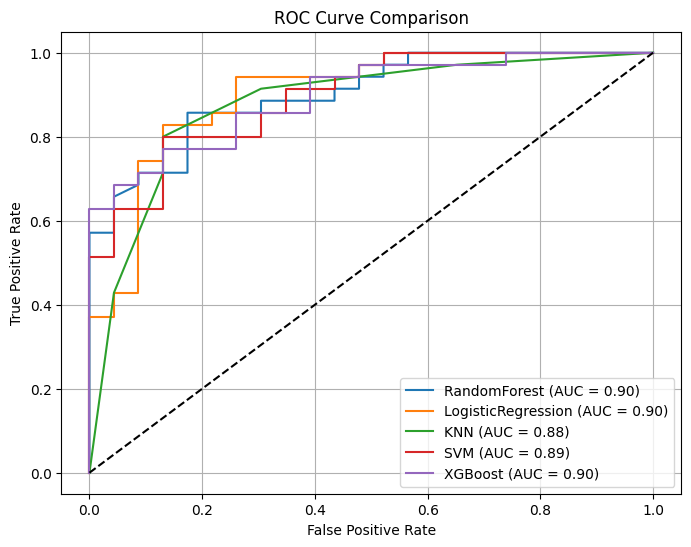

In [24]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    # Train the model before using it
    model.fit(X_train, y_train)

    #  Now get prediction probability
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]

        # Calculate FPR, TPR
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Random guessing line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
